In [20]:
# Training a neural network on MNIST with Keras
import tensorflow as tf
import tensorflow_datasets as tfds

2021-10-30 04:15:08.037736: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


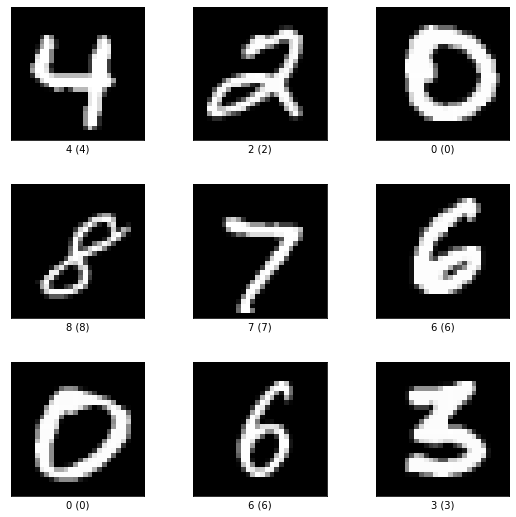

Number of original training examples: 60000
Number of original test examples: 10000


In [22]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

show = tfds.show_examples(ds_test, ds_info)

print("Number of original training examples:", len(ds_train))
print("Number of original test examples:", len(ds_test))


In [23]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [24]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [25]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 3s 2ms/step - loss: 0.3552 - sparse_categorical_accuracy: 0.9015 - val_loss: 0.1884 - val_sparse_categorical_accuracy: 0.9479
Epoch 2/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1643 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.1362 - val_sparse_categorical_accuracy: 0.9612
Epoch 3/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1181 - sparse_categorical_accuracy: 0.9663 - val_loss: 0.1064 - val_sparse_categorical_accuracy: 0.9685
Epoch 4/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0904 - sparse_categorical_accuracy: 0.9740 - val_loss: 0.0895 - val_sparse_categorical_accuracy: 0.9734
Epoch 5/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0722 - sparse_categorical_accuracy: 0.9794 - val_loss: 0.0893 - val_sparse_categorical_accuracy: 0.9720
Epoch 6/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0604 - sparse_categorical_accu